Fetched 3675439 transactions
         scoring_v1    scoring_v2
count  3.675439e+06  3.675439e+06
mean   2.192970e-01  1.985108e-01
std    8.715589e-02  8.259503e-02
min   -2.346918e-01 -1.921282e-01
25%    1.964557e-01  1.627383e-01
50%    2.536144e-01  2.316923e-01
75%    2.795692e-01  2.612880e-01
max    2.864268e-01  2.693719e-01


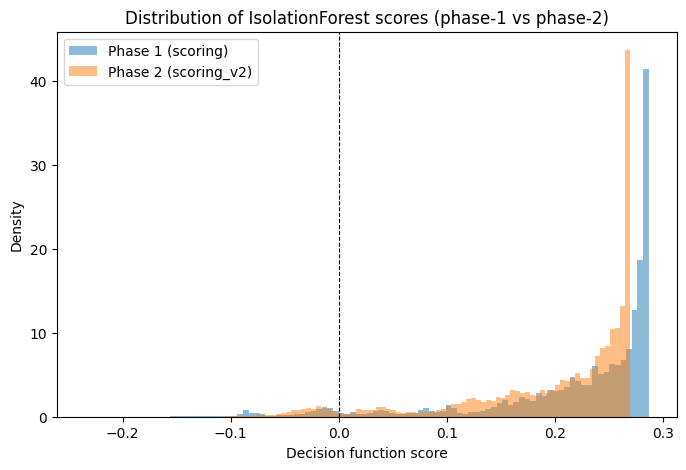

In [3]:
from neo4j import GraphDatabase
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# --- Neo4j connection ---
driver = GraphDatabase.driver("bolt://192.168.0.5:7687", auth=("neo4j", "PotatoDTND12!"))

#1743476400 Unix time for 2025 April 1st UTC 3 AM 
#1746068400 Unix time for 2025 May 1st UTC 3 AM
query = """
MATCH (tx:Transaction)
WHERE tx.scoring IS NOT NULL 
    AND tx.scoring_v2 IS NOT NULL
    AND tx.timestamp >= 1743476400 
    AND tx.timestamp < 1746068400 
RETURN tx.scoring AS scoring_v1, tx.scoring_v2 AS scoring_v2, tx.label_v2 AS label_v2
"""

with driver.session() as session:
    df = pd.DataFrame([dict(r) for r in session.run(query)])

print(f"Fetched {len(df)} transactions")

# --- Compute descriptive stats ---
print(df[['scoring_v1','scoring_v2']].describe())

# --- Plot overlapping histograms ---
plt.figure(figsize=(8,5))
plt.hist(df['scoring_v1'], bins=100, alpha=0.5, label='Phase 1 (scoring)', density=True)
plt.hist(df['scoring_v2'], bins=100, alpha=0.5, label='Phase 2 (scoring_v2)', density=True)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Distribution of IsolationForest scores (phase-1 vs phase-2)")
plt.xlabel("Decision function score")
plt.ylabel("Density")
plt.legend()
plt.show()
